In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 100)

data = pd.read_csv('data.csv')

In [164]:
data.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


In [166]:
data.loc[data['Output']=='Non Fertile']

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile
5,8.36,0.73,0.03,0.05,151,10.5,230,0.38,2.5,0.37,4.2,94.2,1.5,4.3,6.23,3.34,Non Fertile
6,7.69,0.11,0.04,0.06,112,8.0,120,0.51,3.1,0.32,1.2,96.2,1.7,2.1,0.00,1.72,Non Fertile
7,8.39,0.06,0.04,0.06,125,18.5,145,0.67,2.8,0.18,1.8,87.9,4.8,7.3,0.00,7.34,Non Fertile
10,8.26,0.11,0.04,0.06,114,12.0,276,0.89,6.1,0.45,4.8,91.2,4.0,4.8,0.00,2.80,Non Fertile
14,8.38,0.10,0.06,0.10,125,7.1,198,0.48,4.2,0.15,0.8,88.8,4.9,6.3,4.80,2.40,Non Fertile
15,8.37,0.12,0.06,0.10,120,3.2,288,0.41,3.3,0.35,3.1,86.9,7.1,6.0,0.00,5.60,Non Fertile
16,8.52,0.10,0.06,0.10,128,7.9,260,0.52,4.0,0.22,4.2,91.1,4.1,4.8,15.12,2.60,Non Fertile
17,8.67,0.23,0.07,0.12,134,10.4,410,0.34,2.5,0.11,0.4,88.6,4.2,7.2,0.00,2.82,Non Fertile


In [84]:
def Output(s):
  if s == "Non Fertile":
    return 0
  elif s== "Fertile":
    return 1
  return 3


data.Output = data.Output.map(Output)

In [85]:
data.head()
# test.isnull().any()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,1
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,1
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,1
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,0
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,0


In [86]:
out_cols = data['Output']
X = data.drop(['Output'],axis=1)
y = out_cols
print X,y

split = int(0.75*data.shape[0])
X_train = X[:split]
Y_train = y[:split]
Y_train = np.asarray(Y_train).flatten()


X_test = X[split:]
Y_test = y[split:]
Y_test = np.asarray(Y_test).flatten()

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

      pH    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  Clay  CaCO3    CEC
0   7.74  0.40  0.01  0.01   75  20.0  279  0.48  6.4  0.21  4.7  84.3   6.8   8.9   6.72   7.81
1   9.02  0.31  0.02  0.03   85  15.7  247  0.27  6.4  0.16  5.6  90.4   3.9   5.7   4.61   7.19
2   7.80  0.17  0.02  0.03   77  35.6  265  0.46  6.2  0.51  6.1  84.5   6.9   8.6   1.53  12.32
3   8.36  0.02  0.03  0.05  106   6.4  127  0.50  3.1  0.28  2.3  93.9   1.7   4.4   0.00   1.60
4   8.36  1.08  0.03  0.05   96  10.5   96  0.31  3.2  0.23  4.1  91.5   4.1   4.4   9.08   7.21
5   8.36  0.73  0.03  0.05  151  10.5  230  0.38  2.5  0.37  4.2  94.2   1.5   4.3   6.23   3.34
6   7.69  0.11  0.04  0.06  112   8.0  120  0.51  3.1  0.32  1.2  96.2   1.7   2.1   0.00   1.72
7   8.39  0.06  0.04  0.06  125  18.5  145  0.67  2.8  0.18  1.8  87.9   4.8   7.3   0.00   7.34
8   7.87  0.43  0.04  0.06  112  27.0  333  0.75  3.9  0.54  1.8  80.5   5.7  13.8   3.21  11.02
9   8.09  0.62  0.04  0.06   8

In [149]:
from sklearn.ensemble import RandomForestClassifier
print '----- RANDOM FOREST -----'
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, Y_train)
testlabel = rf.predict(X_test)
print testlabel

###########################
p = pd.DataFrame(testlabel,columns=['Output'])
for i in range(len(testlabel)):
    if testlabel[i]==0:
        p.loc[i] = "Non Fertile"
    else:
        p.loc[i] = "Fertile"
print p
###########################





acc= rf.score(X_test,Y_test)
print "Accuracy: ",acc*100,"%"

----- RANDOM FOREST -----
[0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
         Output
0   Non Fertile
1       Fertile
2       Fertile
3   Non Fertile
4   Non Fertile
5   Non Fertile
6       Fertile
7       Fertile
8   Non Fertile
9       Fertile
10      Fertile
11      Fertile
12      Fertile
13      Fertile
14      Fertile
15      Fertile
16      Fertile
17  Non Fertile
18      Fertile
19      Fertile
20      Fertile
21  Non Fertile
22      Fertile
23  Non Fertile
24      Fertile
Accuracy:  92.0 %


In [170]:
new_res = X_test
new_res = new_res.reset_index()
#######################################################
label = pd.DataFrame(testlabel,columns=['Output'])
for i in range(len(testlabel)):
    if testlabel[i]==0:
        label.loc[i] = "Non Fertile"
    else:
        label.loc[i] = "Fertile"
#######################################################
res=pd.concat([new_res,label],axis = 1)
pd.set_option('expand_frame_repr', False)

res[res['Output']=='Non Fertile']

,index,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,75,8.40,0.35,0.24,0.41,220,18.3,320,0.74,2.1,0.37,3.7,90.2,3.4,6.4,6.28,3.78,Non Fertile
3,78,8.20,0.10,0.28,0.48,231,2.7,145,0.34,3.2,0.30,1.6,94.5,1.2,4.3,0.00,2.10,Non Fertile
4,79,8.64,0.15,0.30,0.51,242,1.8,197,0.25,3.1,0.12,0.2,91.2,3.7,5.1,1.25,2.28,Non Fertile
5,80,8.48,0.08,0.30,0.51,235,2.8,142,0.39,2.6,0.27,2.1,89.8,4.5,5.7,8.32,1.78,Non Fertile
8,83,8.61,0.18,0.36,0.62,274,9.2,225,0.58,4.3,0.28,2.1,96.1,1.9,2.0,3.02,7.09,Non Fertile
17,92,8.42,0.74,0.46,0.79,274,3.7,317,0.98,1.9,0.14,2.1,88.3,6.1,5.6,5.23,10.94,Non Fertile
21,96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,Non Fertile
23,98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,Non Fertile


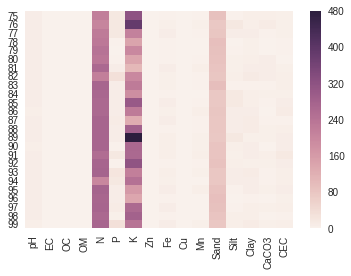

In [171]:
sns.heatmap(X_test)

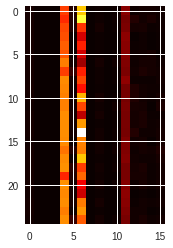

In [172]:
plt.imshow(X_test, cmap='hot', interpolation='nearest')

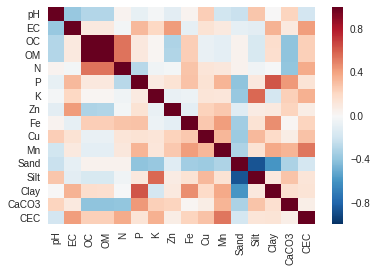

In [173]:
sns.heatmap(X_test.corr())

In [174]:
def convert_output(s):
    if s==0:
        return "Non-Fertile"
    else:
        return "Fertile"

res = X_test.reset_index(drop='true')
label = pd.DataFrame(testlabel.flatten())
res = pd.concat([res,label],axis=1)
res.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC','Output']
res.Output = res.Output.map(convert_output)

In [175]:
for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        print row['pH']

8.4
8.2
8.64
8.48
8.61
8.42
7.5
8.12


In [176]:
print res
print new

      pH    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  Clay  CaCO3    CEC       Output
0   8.40  0.35  0.24  0.41  220  18.3  320  0.74  2.1  0.37  3.7  90.2   3.4   6.4   6.28   3.78  Non-Fertile
1   8.50  0.16  0.24  0.41  205  20.5  387  0.67  4.6  0.28  5.2  77.2  17.0   5.8  12.80   4.87      Fertile
2   8.47  0.19  0.27  0.46  225  17.3  212  0.53  8.3  0.04  3.1  82.1   7.9  10.0   3.70   5.09      Fertile
3   8.20  0.10  0.28  0.48  231   2.7  145  0.34  3.2  0.30  1.6  94.5   1.2   4.3   0.00   2.10  Non-Fertile
4   8.64  0.15  0.30  0.51  242   1.8  197  0.25  3.1  0.12  0.2  91.2   3.7   5.1   1.25   2.28  Non-Fertile
5   8.48  0.08  0.30  0.51  235   2.8  142  0.39  2.6  0.27  2.1  89.8   4.5   5.7   8.32   1.78  Non-Fertile
6   8.20  0.12  0.31  0.53  265   8.7  107  1.13  8.2  0.23  6.0  86.2   4.5   9.3   8.47   4.46      Fertile
7   8.42  0.74  0.34  0.58  218  33.7  198  1.16  4.2  0.53  3.3  80.7   5.7  13.6   8.21   6.02      Fertile
8   8.61  

In [177]:
def Fertilize(row):
    val = 0
    
    if row['N']<280:
        val = 'N: '+ str(280 - row['N'])
        row['N'] = 280
    elif row['N']>560:
        val = 'N: '+ str(560 - row['N'])
        row['N'] = 560
        
    elif row['P']<12.5:
        val = 'P: '+ str(12.5 - row['P'])
        row['P'] = 12.5
    elif row['P']>25:
        val = 'P: '+ str(25 - row['P'])
        row['P'] = 25
        
    elif row['K']<135:
        val = 'K: '+ str(135 - row['K'])
        row['K'] = 135
    elif row['K']>335:
        val = 'K: '+ str(335 - row['K'])
        row['K'] = 335
        
    elif row['OC']<0.5:
        val = 'OC: '+ str(0.5 - row['OC'])
        row['OC'] = 0.5
    elif row['OC']>0.75:
        val = 'OC: '+ str(0.75 - row['OC'])
        row['OC'] = 0.75
        
    elif row['Cu'] < 0.2:
        val = 'Cu: '+ str(0.2 - row['Cu'])
        row['Cu'] = 0.2
    elif row['Fe'] < 4.5:
        val = 'Fe: '+ str(4.5 - row['Fe'])
        row['Fe'] = 4.5
    elif row['Zn']<0.6:
        val = 'Zn: '+ str(0.6 - row['Zn'])
        row['Zn'] = 0.6
    elif row['Mn']<1:
        val = 'Mn: '+ str(1 - row['Mn'])
        row['Mn'] = 1
        
    elif row['pH']<6.5:
        val = 'pH: '+ str(6.5 - row['pH'])
        row['pH'] = 6.5
    elif row['pH']>8:
        val = 'pH: '+ str(8 - row['pH'])
        row['pH'] = 8
        
    elif row['EC']>2.5:
        val = 'EC: '+ str(2.5 - row['EC'])
        row['EC'] = 2.5
    elif row['EC']>1.6:
        val = 'EC: '+ str(1.6 - row['EC'])
        row['EC'] = 1.6
    elif row['EC']>0.8:
        val = 'EC: '+ str(0.8 - row['EC'])
        row['EC'] = 0.8

#     sand
#     silt
#     clay
    
#     elif row['CaCO3']<5:
#         val = 'CaCO3: '+ str(5 - row['CaCO3'])
#         row['CaCO3'] = 5
        
    return val,row

In [178]:
final_l = []

for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        val = 0
        new_p = 0
        l = []
        for inner_loop in range(15):
            val, row = Fertilize(row)
            if val!=0:
                l.append(val)

            n_test = row
            new = pd.DataFrame(n_test[0:16].values.reshape(1,-1))
            new.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC']
            new_p = rf.predict(new)
        final_l.append(l)
for i in range(len(final_l)):
    print i,final_l[i]

0 ['N: 60', 'OC: 0.26', 'Fe: 2.4', 'pH: -0.4']
1 ['N: 49', 'P: 9.8', 'OC: 0.22', 'Fe: 1.3', 'Zn: 0.26', 'pH: -0.2']
2 ['N: 38', 'P: 10.7', 'OC: 0.2', 'Cu: 0.08', 'Fe: 1.4', 'Zn: 0.35', 'Mn: 0.8', 'pH: -0.64']
3 ['N: 45', 'P: 9.7', 'OC: 0.2', 'Fe: 1.9', 'Zn: 0.21', 'pH: -0.48']
4 ['N: 6', 'P: 3.3', 'OC: 0.14', 'Fe: 0.2', 'Zn: 0.02', 'pH: -0.61']
5 ['N: 6', 'P: 8.8', 'OC: 0.04', 'Cu: 0.06', 'Fe: 2.6', 'pH: -0.42']
6 ['N: 8', 'P: 3.0', 'Cu: 0.08', 'Fe: 1.9']
7 ['N: 15', 'P: 7.9', 'Cu: 0.02', 'Fe: 0.8', 'Zn: 0.22', 'Mn: 0.2', 'pH: -0.12']
